In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.animation as anim

In [2]:
plt.rcParams['text.usetex'] = True

plt.rcParams['text.latex.preamble'] = []
# plt.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage[libertine]{newtxmath}']
# plt.rcParams['text.latex.preamble'] += [r'\usepackage{mathtools}', r'\usepackage{amssymb}']

In [6]:
# Colours
bg_col = '#131313'
fg_col = '#F4F6F8'

# The equation
eqn = r'$\displaystyle e^{\mathrm{i}\theta} = \cos\theta + \mathrm{i}\sin{\theta}$'
# eqn = r'$\displaystyle e^{\mathrm{i}\pi} = -1$'

# The min & max values of the horizontal and verticle lines (axis coordinates)
xmin, xmax = 0.15, 0.85
ymin, ymax = 0.14, 0.86

# The radius for the arcs
r = 6

### Animate Straight Lines (Box) Around the Equation

<IPython.core.display.Javascript object>


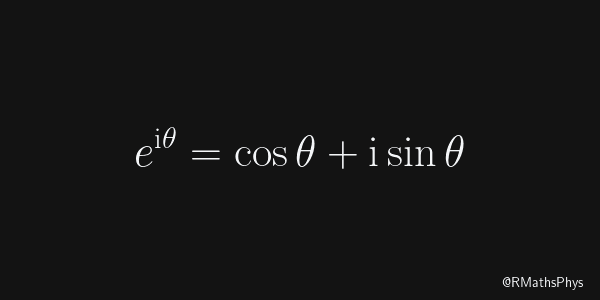

In [8]:
# Setup the figure
fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True, facecolor=bg_col)

# Get the axis ready
ax.axis(False)
ax.set_aspect('equal')
ax.set_ylim([-2,2])
ax.set_xlim([-6,6])

# Add the equation & username as manually placed text objects
ax.text(x=0.5, y=0.48, transform=ax.transAxes,
        s=eqn, ha='center', va='center', fontsize=32, color=fg_col)

ax.text(x=0.98, y=-0.15, transform=ax.transAxes, usetex='False',
        s='@RMathsPhys', ha='right', va='top', fontsize=10, color=fg_col)

# Get the lines ready for plotting
line1, = ax.plot([], [], transform=ax.transAxes, lw=3, color=fg_col)
line2, = ax.plot([], [], transform=ax.transAxes, lw=3, color=fg_col)

# Hard-coded way to draw the animated lines
xarr1 = []
yarr1 = []
xarr2 = []
yarr2 = []
def update(t):
    if t < 1:        
        xarr1 = [xmax, ((1-t)*xmax)+(t*xmin)]
        yarr1 = [ymax, ymax]
        xarr2 = [xmin, ((1-t)*xmin)+(t*xmax)]
        yarr2 = [ymin, ymin]
    elif t < 2:
        t = t-1
        xarr1 = [xmax, xmin, xmin]
        yarr1 = [ymax, ymax, ((1-t)*ymax)+(t*ymin)]
        xarr2 = [xmin, xmax, xmax]
        yarr2 = [ymin, ymin, ((1-t)*ymin)+(t*ymax)]
    elif t < 3:
        xarr1 = [xmax, xmin, xmin]
        yarr1 = [ymax, ymax, ymin]
        xarr2 = [xmin, xmax, xmax]
        yarr2 = [ymin, ymin, ymax]
    elif t < 4:
        t = t-3
        xarr1 = [((1-t)*xmax)+(t*xmin), xmin, xmin]
        yarr1 = [ymax, ymax, ymin]
        xarr2 = [((1-t)*xmin)+(t*xmax), xmax, xmax]
        yarr2 = [ymin, ymin, ymax]
    elif t < 5:
        t = t-4
        xarr1 = [xmin, xmin]
        yarr1 = [((1-t)*ymax)+(t*ymin), ymin]
        xarr2 = [xmax, xmax]
        yarr2 = [((1-t)*ymin)+(t*ymax), ymax]
    else:
        xarr1 = []
        yarr1 = []
        xarr2 = []
        yarr2 = []
        
    line1.set_data(xarr1, yarr1)
    line2.set_data(xarr2, yarr2)
    return line1, line2

# Assign suitable duration to each animated segment
t1 = np.linspace(0,1,150) # draw horizontal segments
t2 = np.linspace(1,2,100)[1:] # draw vertical segments
t3 = np.linspace(2,3,150)[1:] # pause
t4 = np.linspace(3,4,150)[1:] # remove horizontal segments
t5 = np.linspace(4,5,100)[1:] # remove verticle segments
t6 = np.linspace(5,6,150)[1:] # pause
t = np.concatenate((t1, t2, t3, t4, t5, t6), axis=None)

# Animate using `update(t)` as the frame-by-frame function
ani = anim.FuncAnimation(fig, update, frames=t, interval=10, repeat=False, blit=True)

# Use these if you are exporting the animation to a file
metadata = {'title':'Eulers Trigonometric Formula', 'author':'RMathsPhys'}
writer = anim.FFMpegWriter(metadata=metadata, fps=1000/10)
ani.save('euler-trig-formula.mp4', dpi=300, writer=writer, savefig_kwargs={'facecolor':bg_col})

# Enjoy
plt.show()

### Animate Arcs Around the Equation

<IPython.core.display.Javascript object>


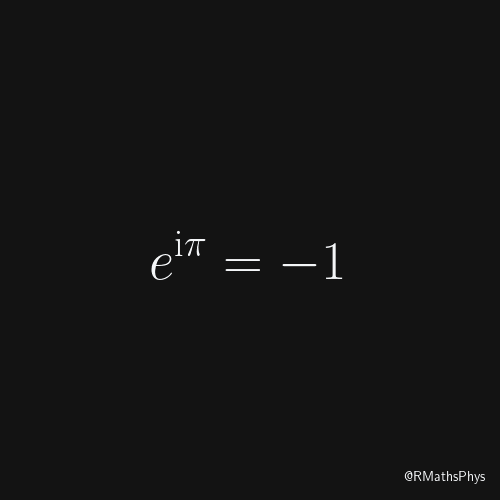

In [5]:
# Setup the figure
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True, facecolor=bg_col)

# Get the axis ready
ax.axis(False)
ax.set_aspect('equal')
ax.set_ylim([-5,5])
ax.set_xlim([-5,5])

# Add the equation & username as manually placed text objects
ax.text(x=0.5, y=0.48, transform=ax.transAxes,
        s=eqn, ha='center', va='center', fontsize=40, color=fg_col)
ax.text(x=0.98, y=0.05, transform=ax.transAxes,
        s='@RMathsPhys', ha='right', va='top', fontsize=10, color=fg_col)

# Get the arcs ready for plotting
arc_top = Arc((0, 0), r, r, theta1=0, theta2=0, lw=5, color=fg_col)
arc_bot = Arc((0, 0), r, r, theta1=180, theta2=180, lw=5, color=fg_col)
ax.add_patch(arc_top)
ax.add_patch(arc_bot)

# Hard-coded way to draw the animated arcs
def animate(i):
    if i < 1:
        pass
    elif i < 2:
        i = i - 1
        u = 180*np.sin(0.5*np.pi*i)**2
        arc_top.theta2 = u
        arc_bot.theta2 = 180 + u
        return arc_top, arc_bot
    elif i < 3:
        pass
    elif i < 4:
        i = i - 3
        u = 180*np.sin(0.5*np.pi*i)**2
        arc_top.theta1 = u
        arc_bot.theta1 = 180 + u
        return arc_top, arc_bot

# Assign suitable duration to each animated segment
t1 = np.linspace(0,1,50) # initial delay
t2 = np.linspace(1,2,200)[1:] # draw the arcs
t3 = np.linspace(2,3,100)[1:] # middle delay
t4 = np.linspace(3,4,200)[1:] # remove the arcs
t5 = np.linspace(4,5,50)[1:] # final delay
t = np.concatenate((t1, t2, t3, t4, t5), axis=None)

# Animate using `update(t)` as the frame-by-frame function
ani = anim.FuncAnimation(fig, animate, frames=t, interval=10, blit=True, repeat=False)

# Use these if you are exporting the animation to a file
metadata = {'title':'Eulers Beautiful Equation', 'author':'RMathsPhys'}
writer = anim.FFMpegWriter(metadata=metadata, fps=1000/10)
ani.save('euler-beautiful-equation.mp4', dpi=300, writer=writer, savefig_kwargs={'facecolor':bg_col})

# Enjoy
plt.show()